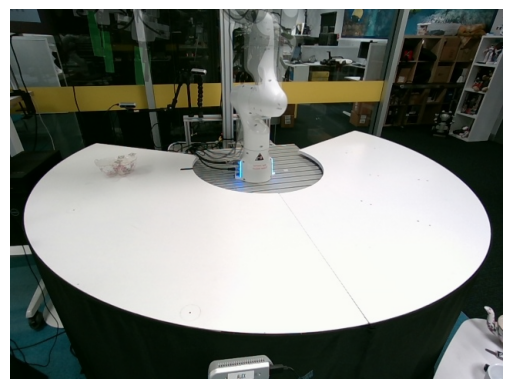

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_blend_images(root_path, alpha=0.99, skip_every=20):
    episodes = sorted(os.listdir(os.path.join(root_path, "episodes")), key=lambda x: int(x))
    images = []
    
    # Load images, skipping every second episode
    for i, episode in enumerate(episodes):
        if i % skip_every != 0:  # Skip every second episode
            continue
        img_path = os.path.join(root_path, "episodes", str(episode), "static_rgb.jpg")
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            images.append(img)
        else:
            print(f"Image not found for episode {episode}")
    
    # Calculate the composite image
    if images:
        composite_image = np.zeros_like(images[0], np.float32)
        for img in images:
            composite_image += img * (alpha / len(images))
    
        composite_image = np.clip(composite_image, 0, 255).astype(np.uint8)
        
        plt.imshow(composite_image)
        plt.axis('off')  # Turn off axis
        plt.show()


# Set the dataset path here
dataset_path = "/home/krishan/work/2024/datasets/cup_rotate_final"
load_and_blend_images(dataset_path)
